# Neural Network with Tensorflow

Langkah membuat neural network : 

- Siapkan Data -> Fitur
  - Open / Gather data
  - Preprocessing
  - Feature Engineering
- Buat Arsitektur NN
  - Sequential API
  - Functional API
- Compile (translate kode -> bahasa mesin) Model NN
  - Tentukan Loss yang digunakan
  - Tentukan Optimizer yang digunakan
  - Tentukan metrik yang ingin dimonitor
  - Callback
- Training

### Modelling with Titanic Data

In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/afifai/pelatihan_machinelearning/master/data/train.csv", index_col=0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=46)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=46)

In [ ]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

num_col = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
cat_col = ['Sex']

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_col),
    ('pipe_cat', cat_pipeline, cat_col)
])

In [ ]:
# ekstrak fitur
X_train = data_pipeline.fit_transform(X_train)
X_val = data_pipeline.transform(X_val)
X_test = data_pipeline.transform(X_test)

In [ ]:
X_train.shape

(681, 7)

In [ ]:
X_val.shape

(76, 7)

In [ ]:
X_test.shape

(134, 7)

### Buat Arsitektur NN

In [ ]:
# sequential API
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

"""
functional api

data_in = Input(shape=(7,))
hidden_1 = Dense(4, activation='relu')(data_in)
out = Dense(1, activation='sigmoid')(hidden_1)

model = Model(inputs=data_in, outputs=out)
"""

# buat arsitekturnya
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(7,))) # hidden layer 1
model.add(Dense(1, activation='sigmoid')) # output layer


# compile
model.compile(loss='binary_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

# train
history = model.fit(X_train, y_train, epochs=300, validation_data=(X_val, y_val))

Epoch 1/300
22/22 [==============================] - 1s 12ms/step - loss: 0.6509 - accuracy: 0.6535 - val_loss: 0.6393 - val_accuracy: 0.6974
Epoch 2/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6299 - accuracy: 0.6916 - val_loss: 0.6202 - val_accuracy: 0.6447
Epoch 3/300
22/22 [==============================] - 0s 6ms/step - loss: 0.6123 - accuracy: 0.6769 - val_loss: 0.6045 - val_accuracy: 0.6447
Epoch 4/300
22/22 [==============================] - 0s 5ms/step - loss: 0.5974 - accuracy: 0.6755 - val_loss: 0.5917 - val_accuracy: 0.6447
Epoch 5/300
22/22 [==============================] - 0s 5ms/step - loss: 0.5849 - accuracy: 0.6769 - val_loss: 0.5815 - val_accuracy: 0.6447
Epoch 6/300
22/22 [==============================] - 0s 6ms/step - loss: 0.5741 - accuracy: 0.6740 - val_loss: 0.5734 - val_accuracy: 0.6447
Epoch 7/300
22/22 [==============================] - 0s 5ms/step - loss: 0.5657 - accuracy: 0.6755 - val_loss: 0.5670 - val_accuracy: 0.6316
Epoch 8/300


In [ ]:
import pandas as pd
metrics = pd.DataFrame(history.history)
metrics.tail()

,loss,accuracy,val_loss,val_accuracy
295,0.408652,0.822320,0.429130,0.789474
296,0.408590,0.822320,0.428873,0.789474
297,0.408727,0.822320,0.428361,0.789474
298,0.408705,0.820852,0.429576,0.789474
299,0.408784,0.823789,0.428488,0.789474


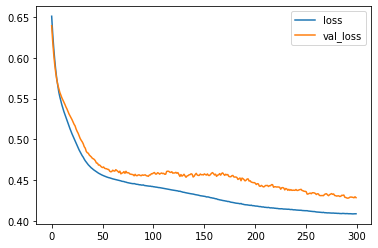

In [ ]:
metrics[['loss', 'val_loss']].plot();

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86        76
           1       0.86      0.72      0.79        58

    accuracy                           0.83       134
   macro avg       0.83      0.82      0.82       134
weighted avg       0.83      0.83      0.83       134



In [ ]:
import tensorflow as tf

tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
# save model
model.save("nn_titanic")

INFO:tensorflow:Assets written to: nn_titanic/assets


In [ ]:
# load model
from tensorflow.keras.models import load_model

model_titanic = load_model("nn_titanic")

In [ ]:
res_model = model_titanic.predict(X_test)

In [ ]:
model_titanic.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 4)                 32        
                                                                 
 dense_5 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 0 - 255
X_train = X_train / 255.0
X_test = X_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
import matplotlib.pyplot as plt

def show_image(image):
  plt.imshow(image, cmap='binary')

5


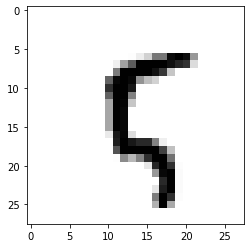

In [ ]:
show_image(X_train[100])
print(y_train[100])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=46)

In [ ]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [ ]:
# siapkan label dengan One Hot Encoding (wajib untuk multiclass)
from tensorflow.keras.utils import to_categorical

y_train_ohe = to_categorical(y_train)
y_val_ohe = to_categorical(y_val)
y_test_ohe = to_categorical(y_test)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
# funtional API
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout


"""
contoh model sequential dengan arsitektur yang sama

model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(256, activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(10, activation='softmax'))

"""
# deklarasikan arsitektur
data_in = Input(shape=(28,28))
data_flat = Flatten()(data_in)
data_drop = Dropout(0.25)(data_flat)
hidden_1 = Dense(256, activation='elu')(data_drop)
hidden_drop = Dropout(0.25)(hidden_1)
hidden_2 = Dense(32, activation='elu')(hidden_drop)
hidden_drop_2 = Dropout(0.25)(hidden_2)
out = Dense(10, activation='softmax')(hidden_drop_2)

model = Model(inputs=data_in, outputs=out)

# compile
model.compile(loss='categorical_crossentropy',
              optimizer='adam', # paling modern
              metrics=['accuracy'])

# train
history = model.fit(X_train, y_train_ohe, epochs=30, validation_data=(X_val, y_val_ohe))

Epoch 1/30
1688/1688 [==============================] - 8s 4ms/step - loss: 0.4638 - accuracy: 0.8580 - val_loss: 0.1826 - val_accuracy: 0.9438
Epoch 2/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2787 - accuracy: 0.9155 - val_loss: 0.1197 - val_accuracy: 0.9625
Epoch 3/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2231 - accuracy: 0.9336 - val_loss: 0.0932 - val_accuracy: 0.9723
Epoch 4/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1950 - accuracy: 0.9417 - val_loss: 0.0869 - val_accuracy: 0.9750
Epoch 5/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1727 - accuracy: 0.9475 - val_loss: 0.0866 - val_accuracy: 0.9727
Epoch 6/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1585 - accuracy: 0.9516 - val_loss: 0.0689 - val_accuracy: 0.9785
Epoch 7/30
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1457 - accuracy: 0.9565 - val_loss: 0.0695 - val_accuracy:

In [ ]:
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dropout_3 (Dropout)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 256)               200960    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_19 (Dense)            (None, 32)                8224      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0   

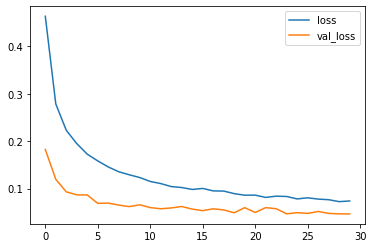

In [ ]:
import pandas as pd
metrics = pd.DataFrame(history.history)
metrics[['loss', 'val_loss']].plot();

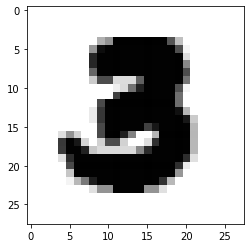

In [ ]:
new_data = X_test[200]

show_image(new_data)

In [ ]:
new_data.shape

(28, 28)

In [ ]:
res = model.predict(new_data.reshape(1, 28, 28))
res.argmax()

3

In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
y_pred = y_pred.argmax(axis=1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.97      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.96      0.99      0.97       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

